<a href="https://colab.research.google.com/github/MasterSlyer10/CSMODEL/blob/main/MCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Correlation between Health Indicators and Stroke Incidence  
  
## CSMODEL Case Study

Joseph Eusebio (S15)
Kenwin Reyes (S15)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Dataset Description



The dataset we are using is called "[Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)" and it is used to predict a patients likelihood of experiencing a stroke based on parameters such as their gender, age, diseases they might have, as well as if they smoke.

## Data Collection
The dataset used in this research was obtained from a confidential source. Due to the confidential nature of the data, details about the specific source are not disclosed to maintain privacy and adhere to the terms of use. The data is intended for educational purposes only, and any utilization for research purposes requires proper crediting to the author, as specified by the source.

The dataset is from: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data   

By the author: Federico Soriano Palacios  
LinkedIn: https://www.linkedin.com/in/federico-soriano-palacios/  
Kaggle: https://www.kaggle.com/fedesoriano  
Github: https://github.com/fedesoriano

In [ ]:
stroke_df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [ ]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Each row in the dataset is a patient and each column is a characteristic of each patient with the last column "stroke" being whether or not they had a stroke.

There are a total of 5110 observations and 12 variables in the dataset.

## Variable Description

The following descriptions of the variables are directly gotten from the source webpage of the dataset.

1.) id: Unique identifier  
2.) gender: "Male", "Female", or "Other" to specify the individuals gender  
3.) age: Age of the patient  
4.) hypertension:  1 If the patient has hypertension, 0 If the patient has no hypertension  
5.) heart_disease: 1 If the patient has heart disease, 0 If the patient has no heart disease  
6.) ever_married: "No" or "Yes" if the person has married  
7.) work_type: "children", "Govt_jov", "Never_worked", "Private", or "Self-employed"  
8.) Residence_type: "Rural" or "Urban"  
9.) avg_glucose_level: average glucose level in the blood of the patient  
10.) bmi: body mass index of the patient  
11.) smoking_status: "formerly smoked", "never smoked", "smokes", or "Unknown" meaning information of the patient was not available  
12.) stroke: 1 If the patient had a stroke, 0 If the patient didn't have a stroke


# Data Cleaning

### Checking for any null values



In [ ]:
stroke_df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
stroke_df['bmi'].isnull().sum()

201

In [ ]:
stroke_df.shape

(5110, 12)

Dropping observations with null values for "bmi"

In [ ]:
stroke_df = stroke_df.dropna(subset='bmi')

The reason why we are dropping observations with a null bmi in the dataset about stroke prediction is because the body mass index (BMI) is an important health indicator that can affect the likelihood of experiencing a stroke. Since the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including BMI, it is important to have complete data for this variable. Dropping observations with null values for BMI ensures that we have a complete dataset for analysis and modeling.

In [ ]:
stroke_df.shape

(4909, 12)

In [ ]:
stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Setting "age" values to int

In [ ]:
stroke_df['age'] = stroke_df['age'].round()

In [ ]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [ ]:
display(stroke_df.dtypes)

id                     int64
gender                object
age                    int32
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Changing the values of age from float to int by rounding is done to make the data more readable and easier to work with. Age is a discrete variable, so it makes sense to represent it as an integer rather than a float. Rounding the age values to the nearest integer ensures that the data is still accurate while making it easier to understand and analyze. Additionally, many statistical methods require integer values, so rounding the age values to the nearest integer can make it easier to perform statistical analyses on the data.

## Dropping of the single observation with the "Other" value for gender

The reason why we are dropping the single observation with "Other" value for gender is because the dataset is used to predict a patient's likelihood of experiencing a stroke based on various health indicators, including gender. Since the "Other" value for gender is not a common value and there is only one observation with this value, it is difficult to accurately predict the likelihood of experiencing a stroke for patients with this value.

In [ ]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df.shape

(4908, 12)

# Exploratory Data Analysis

## Summary Statistics

In [ ]:
stroke_df.drop('id', axis=1).describe().drop('count')


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
mean,42.868989,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.555878,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


## What is the distribution of age, bmi, and average glucose levels across the dataset?

We are exploring the distribution of age, bmi, and average glucose levels across the dataset to gain a better understanding of the characteristics of the patients in the dataset

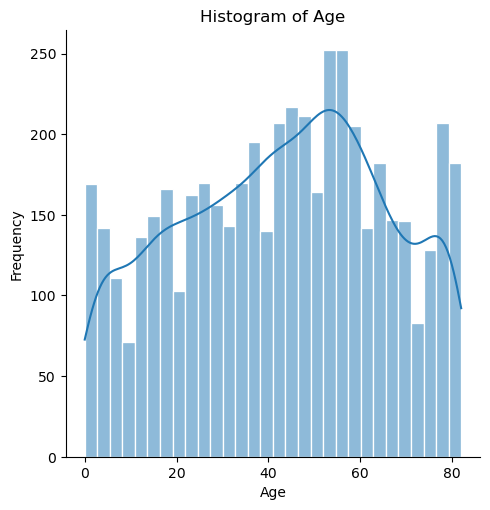

In [ ]:
warnings.filterwarnings('ignore')

sns.displot(stroke_df['age'], bins=30, kde=True, edgecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')


plt.show()


In [ ]:
# count the number of people in the age range of 40 to 60
age_range_count = ((stroke_df['age'] > 40) & (stroke_df['age'] < 60)).sum()

# count the number of people who are not in the age range of 40 to 60
not_age_range_count = ((stroke_df['age'] <= 40) | (stroke_df['age'] >= 60)).sum()

# calculate the proportion of people in the age range of 40 to 60 compared to those who aren't
proportion = age_range_count / not_age_range_count

# display the proportion in percent
print(f"The proportion of people in the age range of 40 to 60 compared to those who aren't is {proportion*100:.2f}%")


The proportion of people in the age range of 40 to 60 compared to those who aren't is 41.52%


This visualization shows us the distribution of age across the dataset. The x-axis represents the age of the patients, and the y-axis represents the frequency of patients with that age.  
  
I can be seen from the histogram that


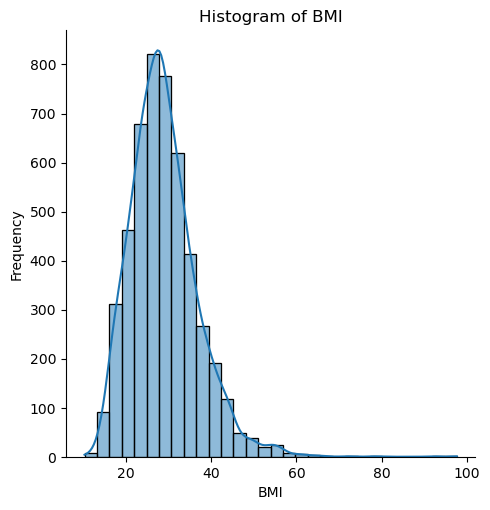

In [ ]:
# Histogram of bmi
sns.displot(stroke_df['bmi'], bins=30, kde=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

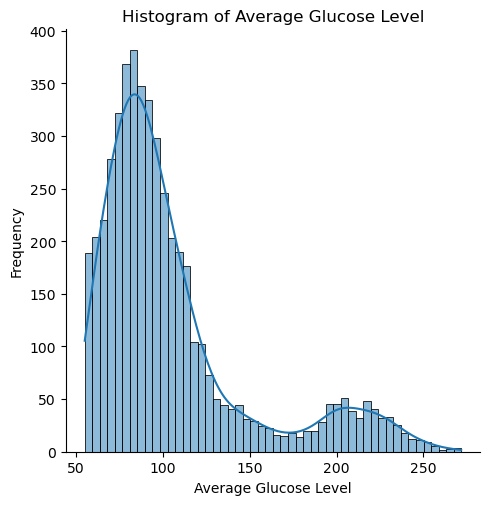

In [ ]:
# Histogram of average glucose level
sns.displot(stroke_df['avg_glucose_level'], bins=50, kde=True)
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.title('Histogram of Average Glucose Level')
plt.show()

# Everything before this point is done.

## What is the proportion of the people who had stroke in the dataset

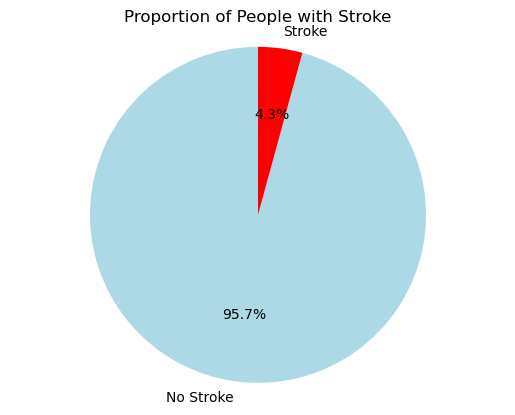

In [ ]:
stroke_count = stroke_df['stroke'].sum()
total_count = stroke_df.shape[0]
proportion = stroke_count / total_count

labels = ['No Stroke', 'Stroke']
sizes = [1-proportion, proportion]
colors = ['lightblue', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of People with Stroke')
plt.show()


## What is the proportion of Male to Female in the dataset?

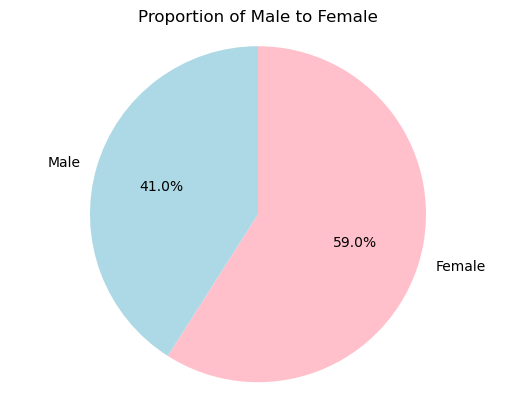

In [ ]:
gender_count = stroke_df['gender'].value_counts()
labels = gender_count.index.tolist()
sizes = gender_count.values.tolist()
colors = ['pink', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')
plt.title('Proportion of Male to Female')
plt.show()


## The distribution of stroke based on gender

   gender  stroke  count
0  Female       0   2777
1  Female       1    120
2    Male       0   1922
3    Male       1     89


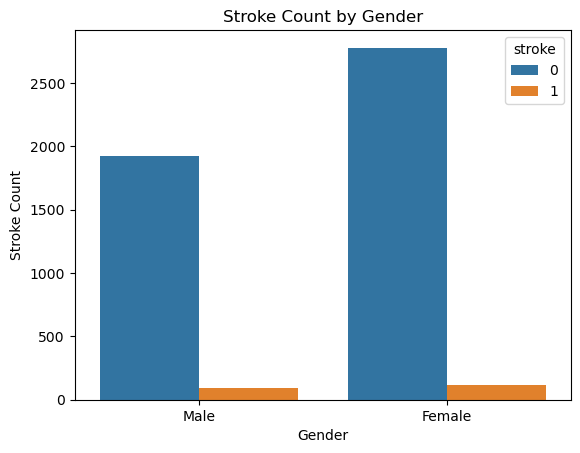

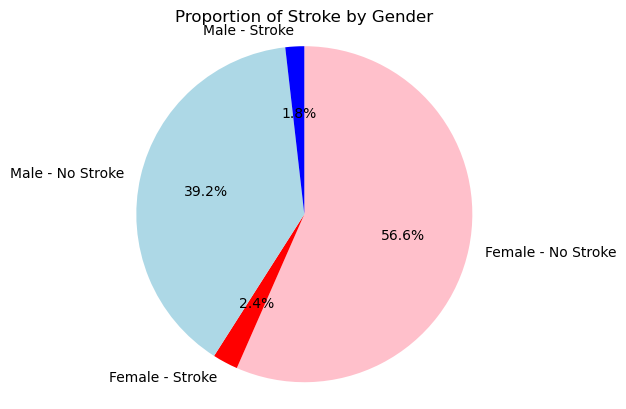

In [ ]:
stroke_gender_count = stroke_df.groupby(['gender', 'stroke']).size().reset_index(name='count')
print(stroke_gender_count)

# Bar plot
sns.countplot(data=stroke_df, x='gender', hue='stroke')
plt.xlabel('Gender')
plt.ylabel('Stroke Count')
plt.title('Stroke Count by Gender')
plt.show()

# Pie chart
labels = ['Female - No Stroke', 'Female - Stroke', 'Male - No Stroke', 'Male - Stroke']
sizes = stroke_gender_count['count'].tolist()
colors = ['pink', 'red', 'lightblue', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')
plt.title('Proportion of Stroke by Gender')
plt.show()


## What are the relationships of the different health attributes to the stroke likelihood?

In [ ]:
stroke_df['stroke'].corr(stroke_df['avg_glucose_level'])

The correlation of the average glucose level of a person to whether they had a stroke is none to low positive correlation

In [ ]:
stroke_df['stroke'].corr(stroke_df['bmi'])

The correlation of the body mass index of a person to whether they had a stroke is none to low positive correlation

In [ ]:
stroke_df['hypertension'].corr(stroke_df['stroke'])

The correlation of whether the person has hypertension to whether they had a stroke is none to low positive correlation

In [ ]:
stroke_df['heart_disease'].corr(stroke_df['stroke'])

The correlation of whether the person has a heart disease to whether they had a stroke is none to low positive correlation

In [ ]:
stroke_df1 = stroke_df.copy()
stroke_df1['smoking_status'] = stroke_df1['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

We replace the smoking_status variable to numerical values so that we can use correlation

In [ ]:
stroke_df1['smoking_status'].value_counts()

In [ ]:
stroke_df1['smoking_status'].isnull().sum()

We didn't map the 'unknown' values in the 'smoking_status' variable, making it mapped to NaN, which we plan to remove from the table

In [ ]:
stroke_df1 = stroke_df1.dropna(subset='smoking_status')
stroke_df1['smoking_status'].isnull().sum()

Since there are no more null values, we can now proceed to correlation

In [ ]:
stroke_df1['smoking_status'].corr(stroke_df1['stroke'])

The correlation of whether the person never smoked, formerly smoked, or still smokes to whether they had a stroke is none to low positive correlation

# Research Question